In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="Glyph .* missing from current font.")

In [3]:
df = pd.read_csv('/kaggle/input/book-data-csv/book1-100k.csv')

In [4]:
df.head()

,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,PublishYear,Language,Authors,Rating,RatingDist2,RatingDist5,ISBN,RatingDist3
0,1,Harry Potter and the Half-Blood Prince (Harry ...,1:9896,652,4:556485,total:2298124,16,9,Scholastic Inc.,28062,2006,eng,J.K. Rowling,4.57,2:25317,5:1546466,NaN,3:159960
1,2,Harry Potter and the Order of the Phoenix (Har...,1:12455,870,4:604283,total:2358637,1,9,Scholastic Inc.,29770,2004,eng,J.K. Rowling,4.50,2:37005,5:1493113,0439358078,3:211781
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,1:108202,309,4:1513191,total:6587388,1,11,Scholastic Inc,75911,2003,eng,J.K. Rowling,4.47,2:130310,5:4268227,NaN,3:567458
3,4,Harry Potter and the Chamber of Secrets (Harry...,1:11896,352,4:706082,total:2560657,1,11,Scholastic,244,2003,eng,J.K. Rowling,4.42,2:49353,5:1504505,0439554896,3:288821
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,1:10128,435,4:630534,total:2610317,1,5,Scholastic Inc.,37093,2004,eng,J.K. Rowling,4.57,2:24849,5:1749958,043965548X,3:194848


In [5]:
df.isnull().sum()

Id                     0
Name                   0
RatingDist1            0
pagesNumber            0
RatingDist4            0
RatingDistTotal        0
PublishMonth           0
PublishDay             0
Publisher            494
CountsOfReview         0
PublishYear            0
Language           37998
Authors                0
Rating                 0
RatingDist2            0
RatingDist5            0
ISBN                 546
RatingDist3            0
dtype: int64

In [6]:
df = df.drop(labels=["Id"],axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58292 entries, 0 to 58291
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             58292 non-null  object 
 1   RatingDist1      58292 non-null  object 
 2   pagesNumber      58292 non-null  int64  
 3   RatingDist4      58292 non-null  object 
 4   RatingDistTotal  58292 non-null  object 
 5   PublishMonth     58292 non-null  int64  
 6   PublishDay       58292 non-null  int64  
 7   Publisher        57798 non-null  object 
 8   CountsOfReview   58292 non-null  int64  
 9   PublishYear      58292 non-null  int64  
 10  Language         20294 non-null  object 
 11  Authors          58292 non-null  object 
 12  Rating           58292 non-null  float64
 13  RatingDist2      58292 non-null  object 
 14  RatingDist5      58292 non-null  object 
 15  ISBN             57746 non-null  object 
 16  RatingDist3      58292 non-null  object 
dtypes: float64(1

In [8]:
def rating_clean(x):
    lst = x.split(':')
    return float(lst[1])

df['RatingDist1'] = df['RatingDist1'].apply(func=rating_clean)
df['RatingDist2'] = df['RatingDist2'].apply(func=rating_clean)
df['RatingDist3'] = df['RatingDist3'].apply(func=rating_clean)
df['RatingDist4'] = df['RatingDist4'].apply(func=rating_clean)
df['RatingDist5'] = df['RatingDist5'].apply(func=rating_clean)
df['RatingDistTotal'] = df['RatingDistTotal'].apply(func=rating_clean)
df = df.drop(labels = ['ISBN'], axis = 1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58292 entries, 0 to 58291
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             58292 non-null  object 
 1   RatingDist1      58292 non-null  float64
 2   pagesNumber      58292 non-null  int64  
 3   RatingDist4      58292 non-null  float64
 4   RatingDistTotal  58292 non-null  float64
 5   PublishMonth     58292 non-null  int64  
 6   PublishDay       58292 non-null  int64  
 7   Publisher        57798 non-null  object 
 8   CountsOfReview   58292 non-null  int64  
 9   PublishYear      58292 non-null  int64  
 10  Language         20294 non-null  object 
 11  Authors          58292 non-null  object 
 12  Rating           58292 non-null  float64
 13  RatingDist2      58292 non-null  float64
 14  RatingDist5      58292 non-null  float64
 15  RatingDist3      58292 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 7.1+ MB


In [10]:
days = df['PublishMonth']
months = df['PublishDay']

df['PublishMonth'] = months
df['PublishDay'] = days

In [11]:
df['Language'].replace('en-US','eng',inplace=True)
df['Language'].replace('en-GB','eng',inplace=True)
df['Language'].replace('en-CA','eng',inplace=True)
df.head()

,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,PublishYear,Language,Authors,Rating,RatingDist2,RatingDist5,RatingDist3
0,Harry Potter and the Half-Blood Prince (Harry ...,9896.0,652,556485.0,2298124.0,9,16,Scholastic Inc.,28062,2006,eng,J.K. Rowling,4.57,25317.0,1546466.0,159960.0
1,Harry Potter and the Order of the Phoenix (Har...,12455.0,870,604283.0,2358637.0,9,1,Scholastic Inc.,29770,2004,eng,J.K. Rowling,4.50,37005.0,1493113.0,211781.0
2,Harry Potter and the Sorcerer's Stone (Harry P...,108202.0,309,1513191.0,6587388.0,11,1,Scholastic Inc,75911,2003,eng,J.K. Rowling,4.47,130310.0,4268227.0,567458.0
3,Harry Potter and the Chamber of Secrets (Harry...,11896.0,352,706082.0,2560657.0,11,1,Scholastic,244,2003,eng,J.K. Rowling,4.42,49353.0,1504505.0,288821.0
4,Harry Potter and the Prisoner of Azkaban (Harr...,10128.0,435,630534.0,2610317.0,5,1,Scholastic Inc.,37093,2004,eng,J.K. Rowling,4.57,24849.0,1749958.0,194848.0


In [12]:
df.drop_duplicates(subset=["Name"],inplace=True)
df.shape

(57510, 16)

In [13]:
df.isnull().sum()

Name                   0
RatingDist1            0
pagesNumber            0
RatingDist4            0
RatingDistTotal        0
PublishMonth           0
PublishDay             0
Publisher            485
CountsOfReview         0
PublishYear            0
Language           37604
Authors                0
Rating                 0
RatingDist2            0
RatingDist5            0
RatingDist3            0
dtype: int64

# EDA

## Number of books published each year

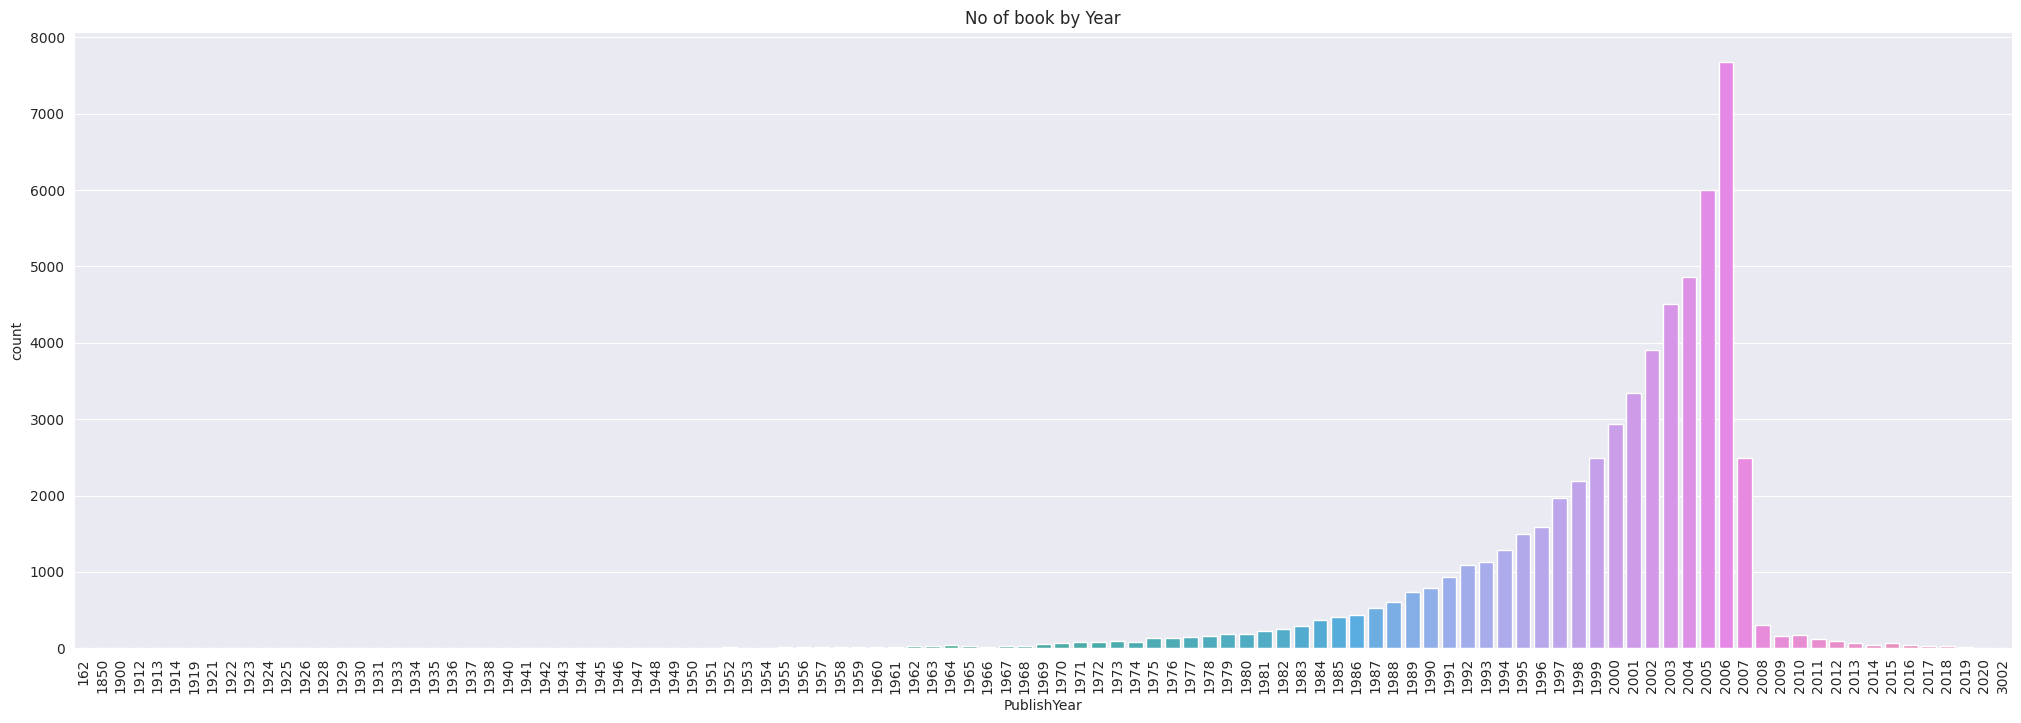

In [14]:
plt.figure(figsize=[25,8])
sns.countplot(data=df,x="PublishYear")
plt.xticks(rotation=90)
plt.title("No of book by Year")
plt.show()

In [15]:
df = df[~((df.PublishYear==162)|(df.PublishYear==3002))] 

## How does a number of pages affect popularity?

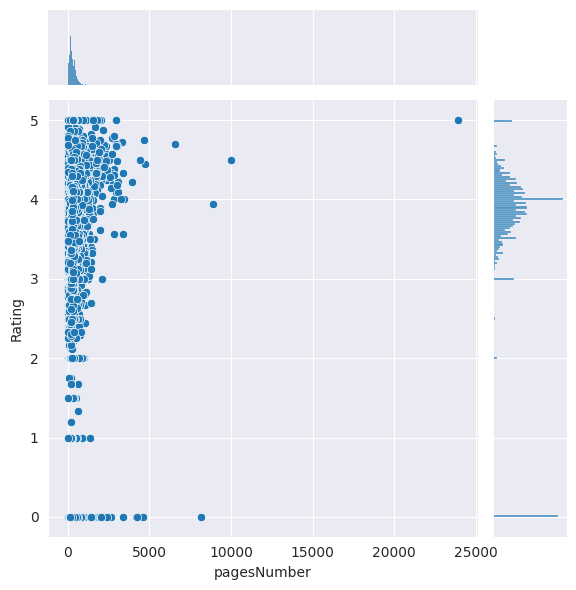

In [16]:
sns.jointplot(data=df,x="pagesNumber",y="Rating",kind="scatter")
plt.show()

## What are the most popular languages?

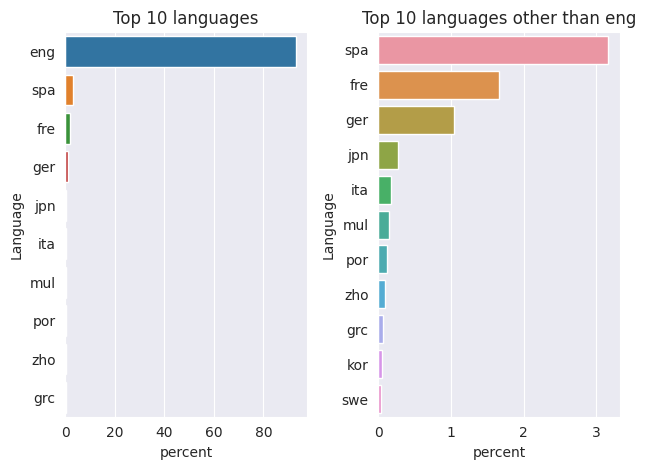

In [17]:
x = df[['Language']].value_counts().reset_index()
x['percent'] = x['count']/sum(x['count'])*100
fig,ax = plt.subplots(nrows=1,ncols=2)
sns.barplot(data=x.iloc[:10],y="Language",x="percent",ax=ax[0])
sns.barplot(data=x.iloc[1:12],y="Language",x="percent",ax=ax[1])
ax[0].set_title("Top 10 languages")
ax[1].set_title("Top 10 languages other than eng")
plt.tight_layout()
plt.show()

## What are the most popular Publisher

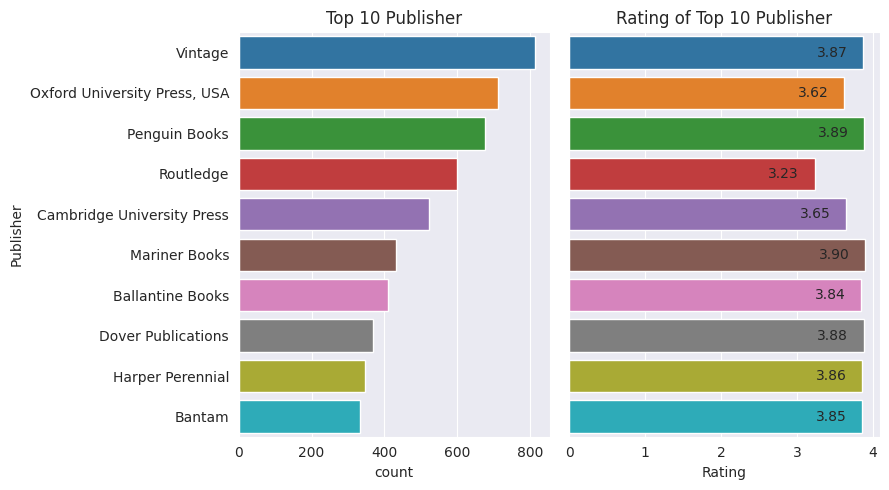

In [18]:
x = df[['Publisher']].value_counts().reset_index()
y = df.groupby('Publisher').mean(numeric_only=True)["Rating"].reset_index()
z = x.merge(y,on='Publisher')
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=[9,5])
sns.barplot(data=z.iloc[:10],y="Publisher",x="count",ax=ax[0])
barplot = sns.barplot(data=z.iloc[:10],y="Publisher",x="Rating",ax=ax[1])

for p in barplot.patches:
    barplot.annotate(f'{p.get_width():.2f}', (p.get_x() - 0.5 + p.get_width(), p.get_y() + p.get_height() / 2),
                     ha='center', va='center', xytext=(5, 0), textcoords='offset points')
ax[1].set_yticks([])
ax[1].set_ylabel("")

ax[0].set_title("Top 10 Publisher")
ax[1].set_title("Rating of Top 10 Publisher")

plt.tight_layout()
plt.show()

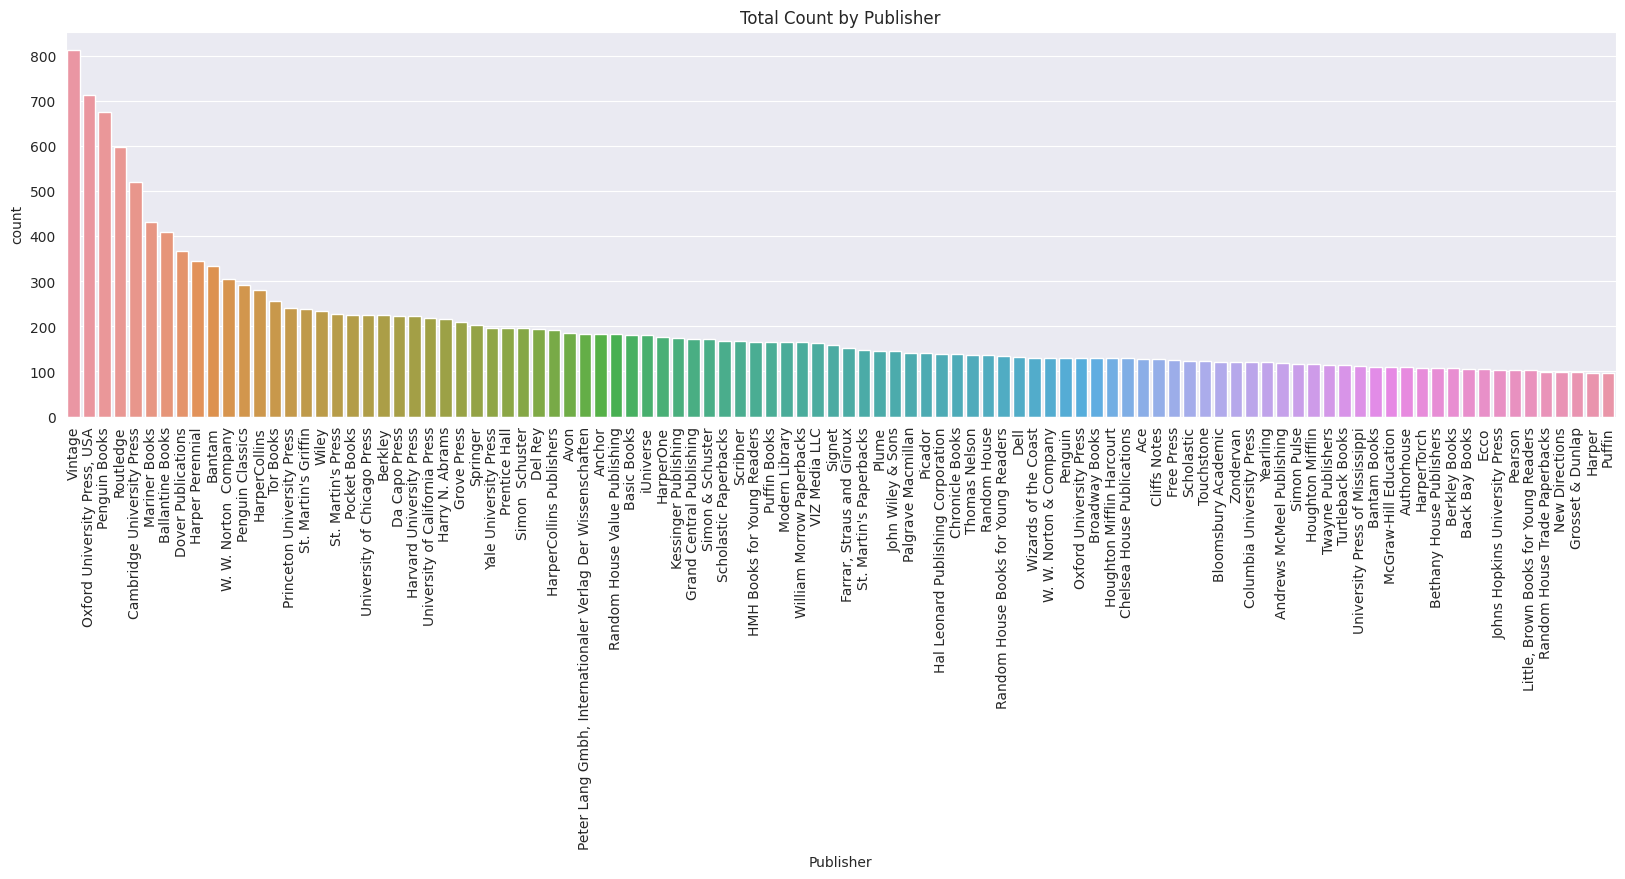

In [19]:
plt.figure(figsize=[20,5])
sns.barplot(data=x.iloc[:100],x="Publisher",y="count")
plt.xticks(rotation = 90)
plt.title("Total Count by Publisher")
plt.show()

## What ratings are more likely?

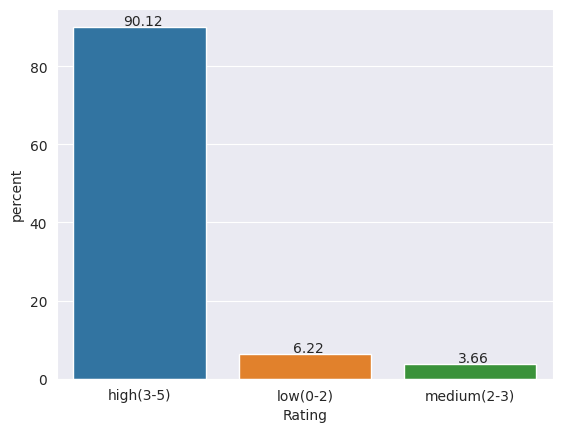

In [20]:
def func(x):
    if x < 2:
        return 'low(0-2)'
    if x >= 2 and x <= 3:
        return 'medium(2-3)'
    if x > 3:
        return 'high(3-5)'
    
x = df['Rating'].apply(func).value_counts().reset_index()
x['percent'] = x['count']/sum(x['count'])*100
barplot = sns.barplot(data=x,y="percent",x='Rating')
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', (p.get_x() -.42 + p.get_width(), p.get_y() + p.get_height()+1.5),
                     ha='center', va='center', xytext=(5, 0), textcoords='offset points')

## Who are the most popular Authors

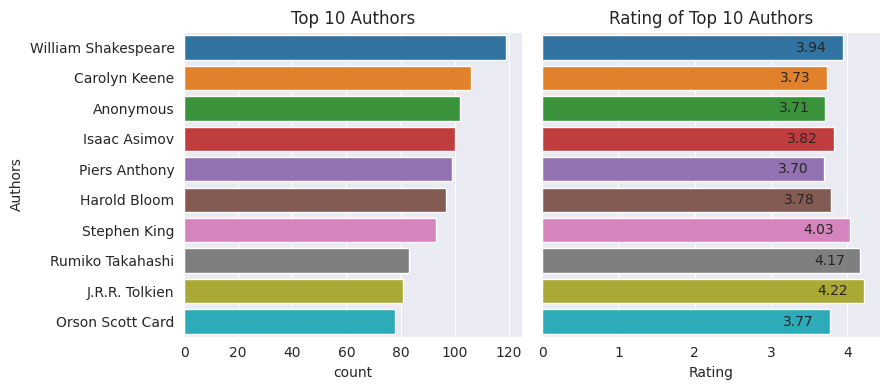

In [21]:
x = df[['Authors']].value_counts().reset_index()
y = df.groupby('Authors').mean(numeric_only=True)["Rating"].reset_index()
z = x.merge(y,on="Authors")

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=[9,4])
sns.barplot(data=z.iloc[:10],y="Authors",x="count",ax=ax[0])
barplot = sns.barplot(data=z.iloc[:10],y="Authors",x="Rating",ax=ax[1])

for p in barplot.patches:
    barplot.annotate(f'{p.get_width():.2f}', (p.get_x() - 0.5 + p.get_width(), p.get_y() + p.get_height() / 2),
                     ha='center', va='center', xytext=(5, 0), textcoords='offset points')
ax[1].set_yticks([])
ax[1].set_ylabel("")

ax[0].set_title("Top 10 Authors")
ax[1].set_title("Rating of Top 10 Authors")

plt.tight_layout()
plt.show()

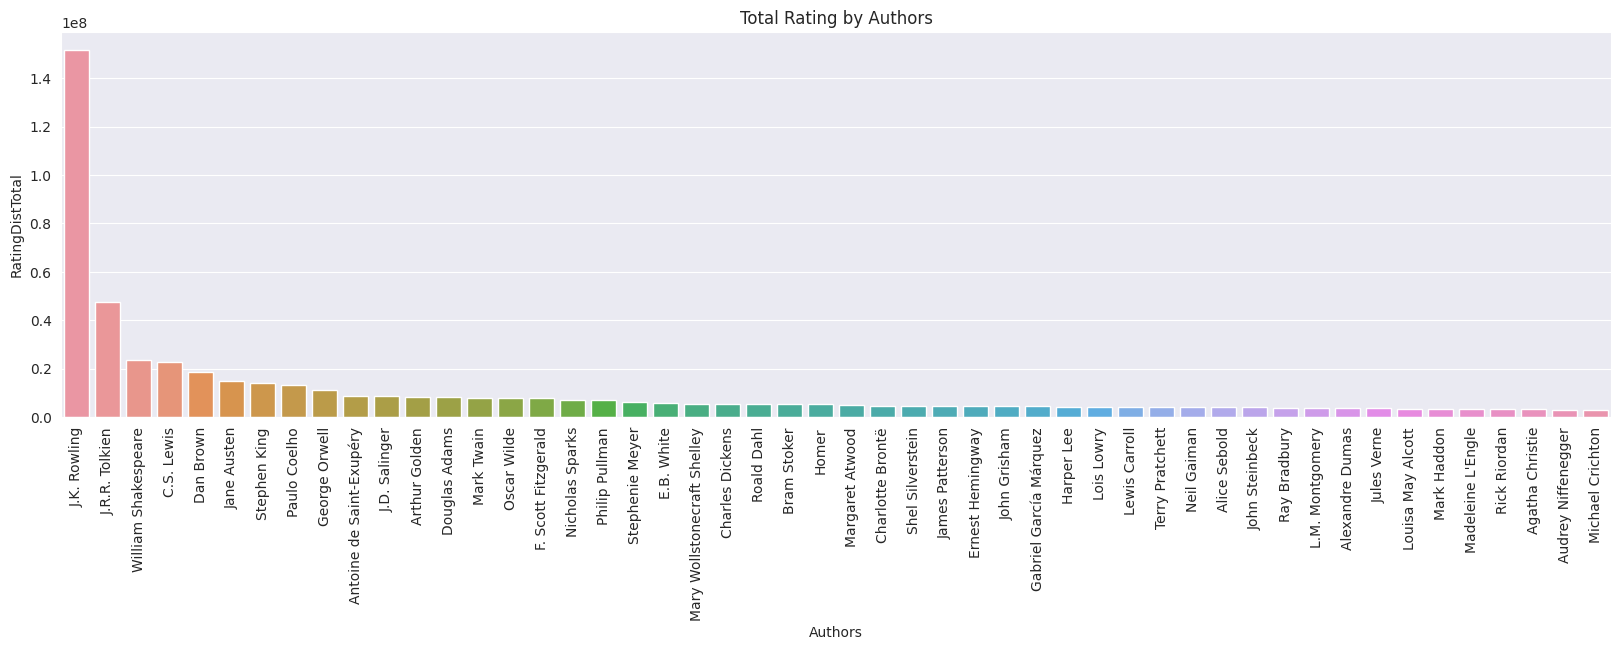

In [22]:
x = df[['Authors','RatingDistTotal']].groupby("Authors").sum().reset_index().sort_values('RatingDistTotal',ascending=False)
x = x.iloc[:50]
plt.figure(figsize=[20,5])
sns.barplot(data=x,x="Authors",y="RatingDistTotal")
plt.xticks(rotation = 90)
plt.title("Total Rating by Authors")
plt.show()

## avg-Rating vs RatingDistTotal

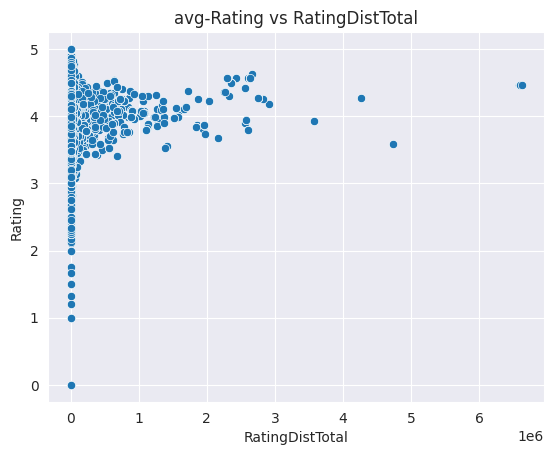

In [23]:
sns.scatterplot(data=df,x="RatingDistTotal",y="Rating")
plt.title("avg-Rating vs RatingDistTotal")
plt.show()

In [24]:
df['Rating_1_percent'] = df['RatingDist1']/df['RatingDistTotal']
df['Rating_2_percent'] = df['RatingDist2']/df['RatingDistTotal']
df['Rating_3_percent'] = df['RatingDist3']/df['RatingDistTotal']
df['Rating_4_percent'] = df['RatingDist4']/df['RatingDistTotal']
df['Rating_5_percent'] = df['RatingDist5']/df['RatingDistTotal']

#final_df = df.drop(labels=['RatingDist1','RatingDist2','RatingDist3','RatingDist4','RatingDist5'],axis=1)
final_df = df.copy()

## Distribution of rating in most popular Publisher

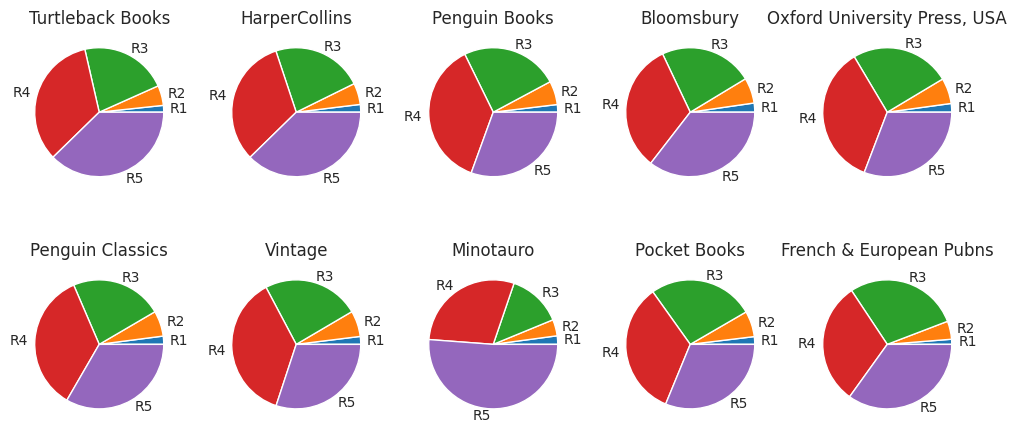

In [25]:
x = final_df[["Publisher","Rating_1_percent","Rating_2_percent","Rating_3_percent","Rating_4_percent","Rating_5_percent"]]
y = pd.pivot_table(data=x,index="Publisher",values=["Rating_1_percent","Rating_2_percent","Rating_3_percent","Rating_4_percent","Rating_5_percent"],aggfunc='mean').reset_index()

z = df[['Publisher','RatingDistTotal']].groupby("Publisher").sum().reset_index().sort_values('RatingDistTotal',ascending=False)
publisher_df = z.merge(y,on="Publisher")

n = 10
data_pie = publisher_df[["Rating_1_percent","Rating_2_percent","Rating_3_percent","Rating_4_percent","Rating_5_percent"]].iloc[:n]
data_pie.columns = ["R1","R2","R3","R4","R5"]

publisher_pie = publisher_df[['Publisher']].iloc[:n]

fig,axs = plt.subplots(nrows=2,ncols=5,figsize=[10,5])

axs[0,0].pie(x=data_pie.iloc[0],labels=data_pie.columns)
axs[0,0].set_title(publisher_pie.iloc[0][0])

axs[0,1].pie(x=data_pie.iloc[1],labels=data_pie.columns)
axs[0,1].set_title(publisher_pie.iloc[1][0])

axs[0,2].pie(x=data_pie.iloc[2],labels=data_pie.columns)
axs[0,2].set_title(publisher_pie.iloc[2][0])

axs[0,3].pie(x=data_pie.iloc[3],labels=data_pie.columns)
axs[0,3].set_title(publisher_pie.iloc[3][0])

axs[0,4].pie(x=data_pie.iloc[4],labels=data_pie.columns)
axs[0,4].set_title(publisher_pie.iloc[4][0])

axs[1,0].pie(x=data_pie.iloc[5],labels=data_pie.columns)
axs[1,0].set_title(publisher_pie.iloc[5][0])

axs[1,1].pie(x=data_pie.iloc[6],labels=data_pie.columns)
axs[1,1].set_title(publisher_pie.iloc[6][0])

axs[1,2].pie(x=data_pie.iloc[7],labels=data_pie.columns)
axs[1,2].set_title(publisher_pie.iloc[7][0])

axs[1,3].pie(x=data_pie.iloc[8],labels=data_pie.columns)
axs[1,3].set_title(publisher_pie.iloc[8][0])

axs[1,4].pie(x=data_pie.iloc[9],labels=data_pie.columns)
axs[1,4].set_title(publisher_pie.iloc[9][0])

plt.tight_layout()

## Distribution of rating in most popular authors

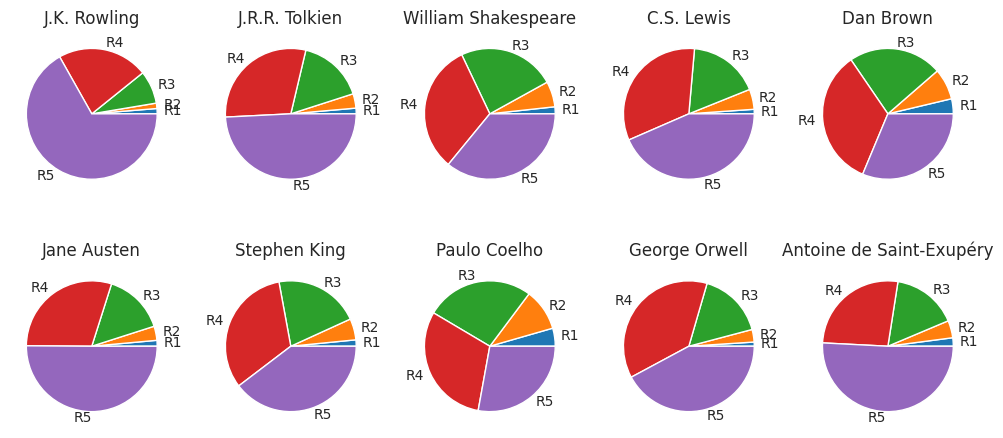

In [26]:
x = final_df[["Authors","Rating_1_percent","Rating_2_percent","Rating_3_percent","Rating_4_percent","Rating_5_percent"]]
y = pd.pivot_table(data=x,index="Authors",values=["Rating_1_percent","Rating_2_percent","Rating_3_percent","Rating_4_percent","Rating_5_percent"],aggfunc='mean').reset_index()

z = df[['Authors','RatingDistTotal']].groupby("Authors").sum().reset_index().sort_values('RatingDistTotal',ascending=False)
author_df = z.merge(y,on="Authors")

n = 10
data_pie = author_df[["Rating_1_percent","Rating_2_percent","Rating_3_percent","Rating_4_percent","Rating_5_percent"]].iloc[:n]
data_pie.columns = ["R1","R2","R3","R4","R5"]

author_pie = author_df[['Authors']].iloc[:n]

fig,axs = plt.subplots(nrows=2,ncols=5,figsize=[10,5])

axs[0,0].pie(x=data_pie.iloc[0],labels=data_pie.columns)
axs[0,0].set_title(author_pie.iloc[0][0])

axs[0,1].pie(x=data_pie.iloc[1],labels=data_pie.columns)
axs[0,1].set_title(author_pie.iloc[1][0])

axs[0,2].pie(x=data_pie.iloc[2],labels=data_pie.columns)
axs[0,2].set_title(author_pie.iloc[2][0])

axs[0,3].pie(x=data_pie.iloc[3],labels=data_pie.columns)
axs[0,3].set_title(author_pie.iloc[3][0])

axs[0,4].pie(x=data_pie.iloc[4],labels=data_pie.columns)
axs[0,4].set_title(author_pie.iloc[4][0])

axs[1,0].pie(x=data_pie.iloc[5],labels=data_pie.columns)
axs[1,0].set_title(author_pie.iloc[5][0])

axs[1,1].pie(x=data_pie.iloc[6],labels=data_pie.columns)
axs[1,1].set_title(author_pie.iloc[6][0])

axs[1,2].pie(x=data_pie.iloc[7],labels=data_pie.columns)
axs[1,2].set_title(author_pie.iloc[7][0])

axs[1,3].pie(x=data_pie.iloc[8],labels=data_pie.columns)
axs[1,3].set_title(author_pie.iloc[8][0])

axs[1,4].pie(x=data_pie.iloc[9],labels=data_pie.columns)
axs[1,4].set_title(author_pie.iloc[9][0])

plt.tight_layout()

# Data Cleaning

In [27]:
final_df[final_df.RatingDistTotal>0].isnull().sum()

Name                    0
RatingDist1             0
pagesNumber             0
RatingDist4             0
RatingDistTotal         0
PublishMonth            0
PublishDay              0
Publisher             449
CountsOfReview          0
PublishYear             0
Language            34203
Authors                 0
Rating                  0
RatingDist2             0
RatingDist5             0
RatingDist3             0
Rating_1_percent        0
Rating_2_percent        0
Rating_3_percent        0
Rating_4_percent        0
Rating_5_percent        0
dtype: int64

In [28]:
final_df['Publisher']=final_df['Publisher'].replace(to_replace=np.nan,value="others")

## Filter by RatingDistTotal

In [29]:
df.shape

(57508, 21)

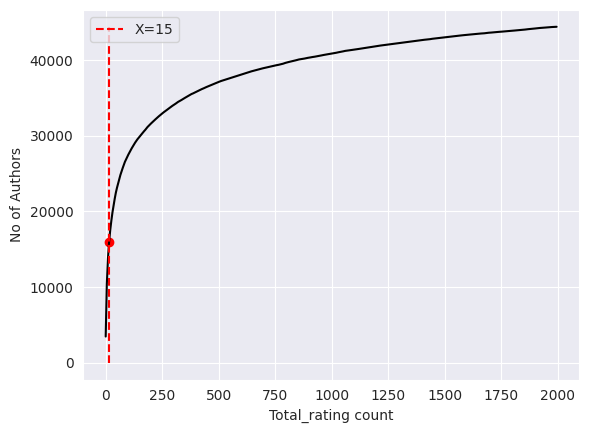

In [30]:
check_df = final_df.copy()
n = np.arange(0,2000,5)
X = []
for i in n:
    X.append(len(check_df[check_df['RatingDistTotal'] <= i]))
    
plt.plot(n,X,color = "black")
plt.xlabel("Total_rating count")
plt.ylabel("No of Authors")
val = 15
plt.vlines(x=val,ymax=max(X),ymin=0,colors="red",label=f"X={val}",linestyles='dashed')
plt.scatter(val,X[np.where(n==val)[0][0]],color = "red")
plt.legend(loc='best')

In [31]:
final_df = final_df[final_df.RatingDistTotal>val]
print("The Dataset shape is :",final_df.shape)
final_df.isnull().sum()

The Dataset shape is : (41555, 21)


Name                    0
RatingDist1             0
pagesNumber             0
RatingDist4             0
RatingDistTotal         0
PublishMonth            0
PublishDay              0
Publisher               0
CountsOfReview          0
PublishYear             0
Language            22615
Authors                 0
Rating                  0
RatingDist2             0
RatingDist5             0
RatingDist3             0
Rating_1_percent        0
Rating_2_percent        0
Rating_3_percent        0
Rating_4_percent        0
Rating_5_percent        0
dtype: int64

In [32]:
for author_key,subdf in final_df[final_df['Language'].isnull()].groupby("Authors"):
    lan_value = final_df[final_df.Authors == author_key]['Language'].mode().values
    if len(lan_value):
        if len(lan_value)>1:
            lan_value = [np.nan]
        mask = (final_df['Language'].isnull()) &(final_df['Authors'] == author_key)
        final_df.loc[mask, 'Language'] = lan_value[0]

In [33]:
final_df.isnull().sum()

Name                    0
RatingDist1             0
pagesNumber             0
RatingDist4             0
RatingDistTotal         0
PublishMonth            0
PublishDay              0
Publisher               0
CountsOfReview          0
PublishYear             0
Language            11982
Authors                 0
Rating                  0
RatingDist2             0
RatingDist5             0
RatingDist3             0
Rating_1_percent        0
Rating_2_percent        0
Rating_3_percent        0
Rating_4_percent        0
Rating_5_percent        0
dtype: int64

In [34]:
final_df.Language = final_df['Language'].replace(np.nan,"other")
final_df.isnull().sum()

Name                0
RatingDist1         0
pagesNumber         0
RatingDist4         0
RatingDistTotal     0
PublishMonth        0
PublishDay          0
Publisher           0
CountsOfReview      0
PublishYear         0
Language            0
Authors             0
Rating              0
RatingDist2         0
RatingDist5         0
RatingDist3         0
Rating_1_percent    0
Rating_2_percent    0
Rating_3_percent    0
Rating_4_percent    0
Rating_5_percent    0
dtype: int64

## Different Publishers

In [35]:
print("No of unique Publishers are: ",final_df.Publisher.nunique())

No of unique Publishers are:  5148


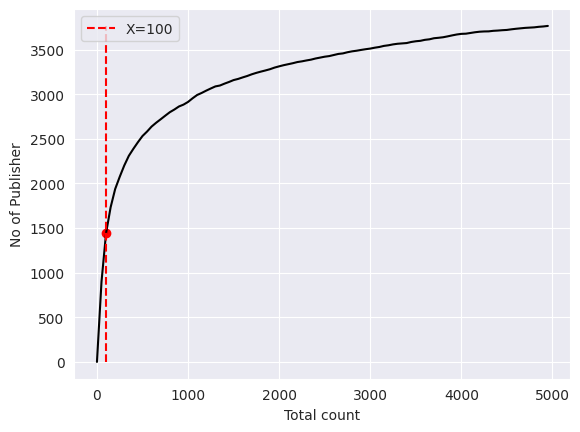

In [36]:
check_df = final_df.groupby("Publisher")[["RatingDistTotal"]].mean().reset_index().sort_values("RatingDistTotal",ascending=False)


n = np.arange(0,5000,50)
X = []
for i in n:
    X.append(len(check_df[check_df['RatingDistTotal']<i]))

plt.plot(n,X,color = "black")
plt.xlabel("Total count")
plt.ylabel("No of Publisher")
val = 100
plt.vlines(x=val,ymax=max(X),ymin=0,colors="red",label=f"X={val}",linestyles='dashed')
plt.scatter(val,X[np.where(n==val)[0][0]],color = "red")
plt.legend(loc='best')

In [37]:
final_df['Publisher'] = final_df['Publisher'].replace(check_df[check_df['RatingDistTotal'] < val]["Publisher"].values,"others")
print("No of unique Publishers are: ",final_df['Publisher'].nunique())

No of unique Publishers are:  3705


## Different Authors

In [38]:
print("No of unique Publishers are: ",final_df['Authors'].nunique())

No of unique Publishers are:  17231


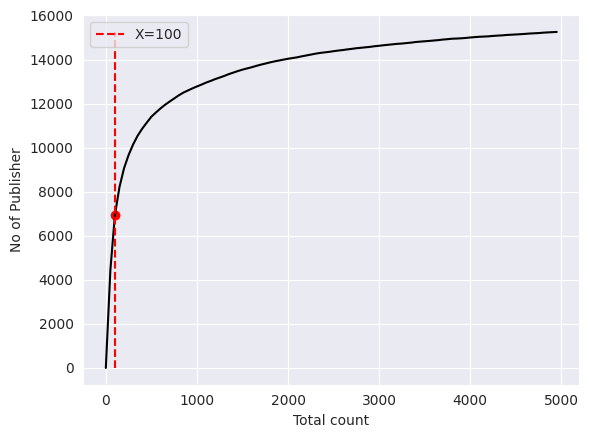

In [39]:
check_df = final_df.groupby("Authors")[["RatingDistTotal"]].mean().reset_index().sort_values("RatingDistTotal",ascending=False)


n = np.arange(0,5000,50)
X = []
for i in n:
    X.append(len(check_df[check_df['RatingDistTotal']<i]))

plt.plot(n,X,color = "black")
plt.xlabel("Total count")
plt.ylabel("No of Publisher")
val = 100
plt.vlines(x=val,ymax=max(X),ymin=0,colors="red",label=f"X={val}",linestyles='dashed')
plt.scatter(val,X[np.where(n==val)[0][0]],color = "red")
plt.legend(loc='best')

In [40]:
final_df['Authors'] = final_df['Authors'].replace(check_df[check_df['RatingDistTotal'] < val]["Authors"].values,"others")
print("No of unique Publishers are: ",final_df['Authors'].nunique())

No of unique Publishers are:  10279


In [41]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
final_df['Language'] = label.fit_transform(final_df["Language"])
final_df.head()

,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,PublishYear,...,Authors,Rating,RatingDist2,RatingDist5,RatingDist3,Rating_1_percent,Rating_2_percent,Rating_3_percent,Rating_4_percent,Rating_5_percent
0,Harry Potter and the Half-Blood Prince (Harry ...,9896.0,652,556485.0,2298124.0,9,16,Scholastic Inc.,28062,2006,...,J.K. Rowling,4.57,25317.0,1546466.0,159960.0,0.004306,0.011016,0.069605,0.242148,0.672925
1,Harry Potter and the Order of the Phoenix (Har...,12455.0,870,604283.0,2358637.0,9,1,Scholastic Inc.,29770,2004,...,J.K. Rowling,4.50,37005.0,1493113.0,211781.0,0.005281,0.015689,0.089790,0.256200,0.633041
2,Harry Potter and the Sorcerer's Stone (Harry P...,108202.0,309,1513191.0,6587388.0,11,1,Scholastic Inc,75911,2003,...,J.K. Rowling,4.47,130310.0,4268227.0,567458.0,0.016426,0.019782,0.086143,0.229710,0.647939
3,Harry Potter and the Chamber of Secrets (Harry...,11896.0,352,706082.0,2560657.0,11,1,Scholastic,244,2003,...,J.K. Rowling,4.42,49353.0,1504505.0,288821.0,0.004646,0.019274,0.112792,0.275743,0.587546
4,Harry Potter and the Prisoner of Azkaban (Harr...,10128.0,435,630534.0,2610317.0,5,1,Scholastic Inc.,37093,2004,...,J.K. Rowling,4.57,24849.0,1749958.0,194848.0,0.003880,0.009520,0.074645,0.241555,0.670401


# Model

In [42]:
final_df.isnull().sum()

Name                0
RatingDist1         0
pagesNumber         0
RatingDist4         0
RatingDistTotal     0
PublishMonth        0
PublishDay          0
Publisher           0
CountsOfReview      0
PublishYear         0
Language            0
Authors             0
Rating              0
RatingDist2         0
RatingDist5         0
RatingDist3         0
Rating_1_percent    0
Rating_2_percent    0
Rating_3_percent    0
Rating_4_percent    0
Rating_5_percent    0
dtype: int64

In [43]:
final_df = final_df.drop(["PublishMonth","PublishDay"],axis=1).reindex()

In [44]:
final_df.drop(["Rating_1_percent","Rating_2_percent","Rating_3_percent","Rating_4_percent","Rating_5_percent"],axis=1,inplace=True)

In [45]:
from sklearn.preprocessing import minmax_scale,scale,robust_scale

final_df["RatingDist1"] = minmax_scale(final_df["RatingDist1"])
final_df["RatingDist2"] = minmax_scale(final_df["RatingDist2"])
final_df["RatingDist3"] = minmax_scale(final_df["RatingDist3"])
final_df["RatingDist4"] = minmax_scale(final_df["RatingDist4"])
final_df["RatingDist5"] = minmax_scale(final_df["RatingDist5"])

final_df["time"] = 2023-final_df['PublishYear']
final_df['time'] = minmax_scale(final_df['time'])
final_df['pagesNumber'] = minmax_scale(final_df['pagesNumber'])
final_df['RatingDistTotal'] = minmax_scale(final_df['RatingDistTotal'])
final_df['CountsOfReview'] = minmax_scale(final_df['CountsOfReview'])

In [46]:
final_df.head()

,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,Publisher,CountsOfReview,PublishYear,Language,Authors,Rating,RatingDist2,RatingDist5,RatingDist3,time
0,Harry Potter and the Half-Blood Prince (Harry ...,0.018635,0.073226,0.365939,0.347017,Scholastic Inc.,0.295857,2006,3,J.K. Rowling,4.57,0.048631,0.360302,0.166333,0.116667
1,Harry Potter and the Order of the Phoenix (Har...,0.023453,0.097709,0.397370,0.356155,Scholastic Inc.,0.313864,2004,3,J.K. Rowling,4.50,0.071082,0.347872,0.220218,0.133333
2,Harry Potter and the Sorcerer's Stone (Harry P...,0.203750,0.034704,0.995058,0.994701,Scholastic Inc,0.800327,2003,3,J.K. Rowling,4.47,0.250308,0.994429,0.590065,0.141667
3,Harry Potter and the Chamber of Secrets (Harry...,0.022401,0.039533,0.464312,0.386660,Scholastic,0.002572,2003,3,J.K. Rowling,4.42,0.094800,0.350526,0.300327,0.141667
4,Harry Potter and the Prisoner of Azkaban (Harr...,0.019072,0.048854,0.414632,0.394159,Scholastic Inc.,0.391070,2004,3,J.K. Rowling,4.57,0.047732,0.407712,0.202610,0.133333


In [47]:
final_df.shape

(41555, 15)

In [48]:
del x,y,z,check_df,df

In [49]:
X = pd.get_dummies(data=final_df.drop(['Name','PublishYear'],axis=1),columns=['Authors','Publisher'],dtype=float).values

In [50]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(X)

In [51]:
indices = pd.Series(np.arange(0,len(final_df)),final_df["Name"]).drop_duplicates()
indices

Name
Harry Potter and the Half-Blood Prince (Harry Potter, #6)           0
Harry Potter and the Order of the Phoenix (Harry Potter, #5)        1
Harry Potter and the Sorcerer's Stone (Harry Potter, #1)            2
Harry Potter and the Chamber of Secrets (Harry Potter, #2)          3
Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)         4
                                                                ...  
The Best American Science and Nature Writing 2005               41550
The Best American Science and Nature Writing 2003               41551
The Best American Science and Nature Writing 2000               41552
The Best American Science and Nature Writing 2002               41553
The Best American Science Writing 2004                          41554
Length: 41555, dtype: int64

In [52]:
def get_recommend(title,df,indices=indices,cosine_sim=cosine_sim,n=10):
    index = indices[title]
    sim_book_score = list(enumerate(cosine_sim[index]))
    sim_book_score_sort = sorted(sim_book_score,key=lambda x:x[1] ,reverse=True)[1:n+1]
    for idx,score in sim_book_score_sort:
        name = df["Name"].iloc[idx]
        author = df["Authors"].iloc[idx]
        publisher = df['Publisher'].iloc[idx]
        print(f"Book: {name}, Author :{author}, Publisher : {publisher}\n")

In [53]:
get_recommend("Fullmetal Alchemist, Vol. 7 (Fullmetal Alchemist, #7)",final_df,n=5)

Book: Fullmetal Alchemist, Vol. 8 (Fullmetal Alchemist, #8), Author :Hiromu Arakawa, Publisher : VIZ Media LLC

Book: Fullmetal Alchemist, Vol. 6 (Fullmetal Alchemist, #6), Author :Hiromu Arakawa, Publisher : VIZ Media LLC

Book: Fullmetal Alchemist, Vol. 5 (Fullmetal Alchemist, #5), Author :Hiromu Arakawa, Publisher : VIZ Media LLC

Book: Fullmetal Alchemist, Vol. 9 (Fullmetal Alchemist, #9), Author :Hiromu Arakawa, Publisher : VIZ Media LLC

Book: Fullmetal Alchemist, Vol. 3 (Fullmetal Alchemist, #3), Author :Hiromu Arakawa, Publisher : VIZ Media LLC

